<a href="https://colab.research.google.com/github/visesh0110/DataVizFall2020_Colab/blob/master/Class_Activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

## Loading US County Level Data

In [198]:
import pandas as pd
import matplotlib.pyplot as plt

In [199]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
## loading data into dataframe
df = pd.read_csv(db)

# Explore data

In [200]:
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [201]:
df.nunique()

date        234
county     1923
state        55
fips       3205
cases     16026
deaths     2381
dtype: int64

In [202]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
df[df['county'].isin(['Bristol','Suffolk']) & df['state'].str.startswith('Mass')].groupby('county')['fips'].mean()

county
Bristol    25005.0
Suffolk    25025.0
Name: fips, dtype: float64

In [204]:
def get_county_stat(df,Bristol_fips):
  temp = df.groupby(['county','state','date']).mean().reset_index()
  return temp[temp['fips'] == Bristol_fips][['date','county','state','cases','deaths']]
  

In [205]:
#ADD CODE HERE - (3)
Bristol_fips = 25005
get_county_stat(df,Bristol_fips).head()

,date,county,state,cases,deaths
44793,2020-03-14,Bristol,Massachusetts,1,0
44794,2020-03-15,Bristol,Massachusetts,1,0
44795,2020-03-16,Bristol,Massachusetts,2,0
44796,2020-03-17,Bristol,Massachusetts,5,0
44797,2020-03-18,Bristol,Massachusetts,5,0


## Explore data type

In [206]:
df_Bristol = get_county_stat(df,25005)
df_Suffolk = get_county_stat(df,25025)
#df_Bristol['month'] = pd.DatetimeIndex(df_Bristol['date']).month
#df_Suffolk['month'] = pd.DatetimeIndex(df_Suffolk['date']).month
#df_Bristol
#df_Suffolk

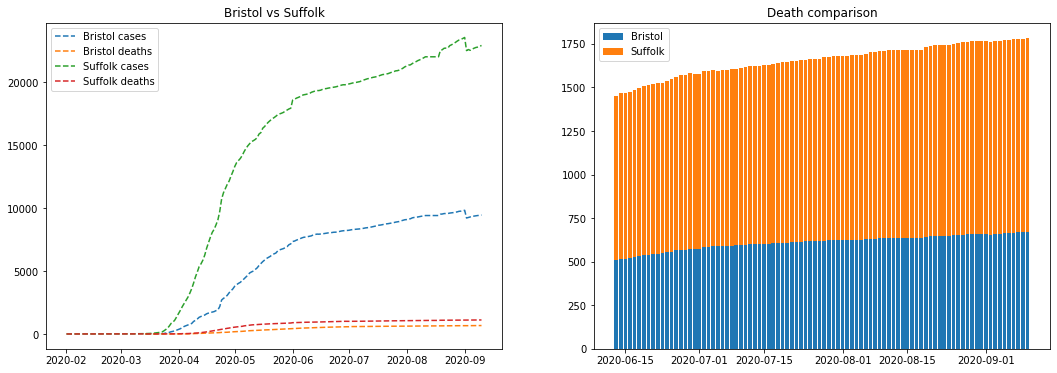

In [207]:
f,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(pd.to_datetime(df_Bristol['date']),df_Bristol['cases'],'--', label = 'Bristol cases')
ax[0].plot(pd.to_datetime(df_Bristol['date']),df_Bristol['deaths'],'--', label = 'Bristol deaths')
ax[0].plot(pd.to_datetime(df_Suffolk['date']),df_Suffolk['cases'],'--',label = 'Suffolk cases')
ax[0].plot(pd.to_datetime(df_Suffolk['date']),df_Suffolk['deaths'],'--',label = 'Suffolk deaths')
ax[0].legend()
ax[1].bar(pd.to_datetime(df_Bristol['date'][-90:]),df_Bristol['deaths'][-90:],label = 'Bristol')
ax[1].bar(pd.to_datetime(df_Suffolk['date'][-90:]),df_Suffolk['deaths'][-90:],bottom = df_Bristol['deaths'][-90:],label = 'Suffolk')
ax[0].set_title("Bristol vs Suffolk")
ax[1].set_title("Death comparison")
ax[1].legend()



## Top 10 counties by number of cases and deaths 



```
# This is formatted as code
```





## Death rate Per FIPS 

In [208]:
df.groupby(['county','state']).sum().reset_index().sort_values(by = ['cases','deaths'], ascending = False)[['county','state','cases','deaths']].head(10)

,county,state,cases,deaths
2106,New York City,New York,32932301,3269101
1748,Los Angeles,California,17648775,503886
647,Cook,Illinois,12938461,585006
1949,Miami-Dade,Florida,9824146,175400
1821,Maricopa,Arizona,9051131,181030
1236,Harris,Texas,6550960,113716
2085,Nassau,New York,6377861,369712
2771,Suffolk,New York,6234841,278679
3139,Westchester,New York,5311253,217049
733,Dallas,Texas,4635688,66967


In [209]:
df.sort_values(['date','fips'])
df['daily_cases'] = df.groupby('fips')['cases'].diff().fillna(0)
df['daily_cases'] = df['daily_cases'].rolling(window =3).max()
df['death_cases'] = df.groupby('fips')['deaths'].diff().fillna(0)
df['death_cases'] = df['death_cases'].rolling(window =3).max()
x = df.groupby(['fips','county'], as_index = False).sum()
x['death_rate'] = x['death_cases']/x['daily_cases']*100
x[['fips','death_rate']]

,fips,death_rate
0,1001.0,2.007528
1,1003.0,1.351616
2,1005.0,1.410658
3,1007.0,1.118568
4,1009.0,1.366607
...,...,...
3200,72151.0,0.000000
3201,72153.0,0.000000
3202,78010.0,1.757812
3203,78020.0,1.716738


## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Friday (09/11/2020 11:59pm)